1/1 [==============================] - 0s 90ms/step
The number is probably a 3


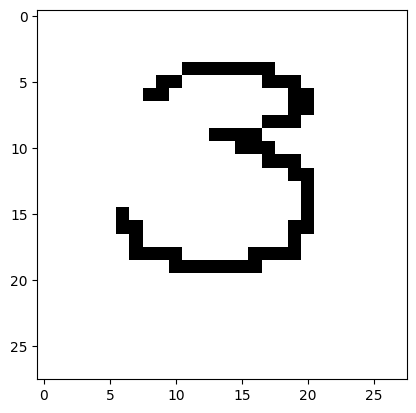

1/1 [==============================] - 0s 38ms/step
The number is probably a 4


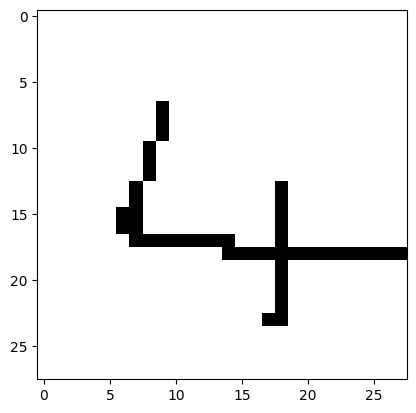

1/1 [==============================] - 0s 42ms/step
The number is probably a 5


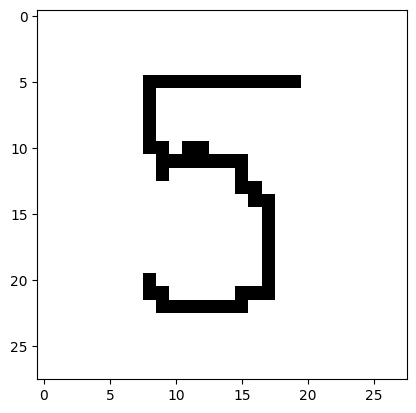

1/1 [==============================] - 0s 41ms/step
The number is probably a 6


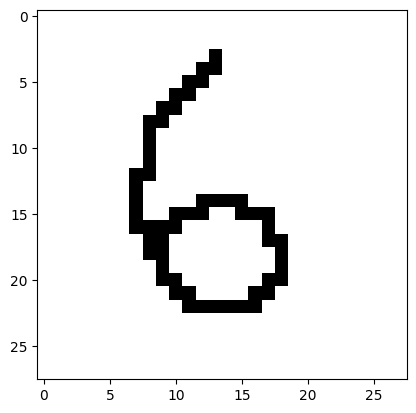

1/1 [==============================] - 0s 33ms/step
The number is probably a 8


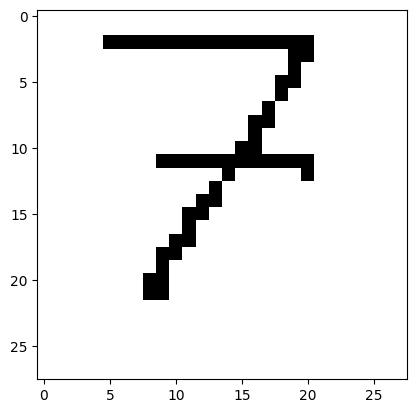

1/1 [==============================] - 0s 36ms/step
The number is probably a 8


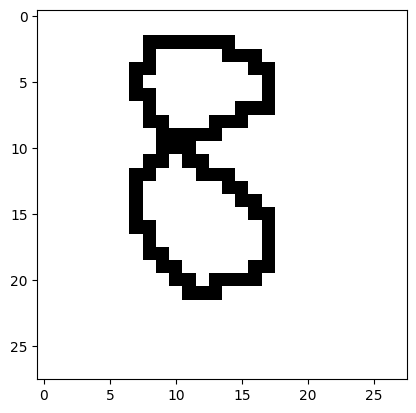

1/1 [==============================] - 0s 34ms/step
The number is probably a 9


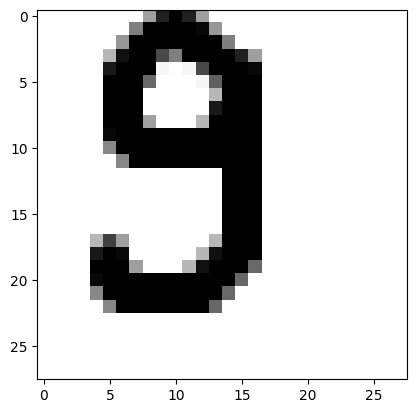

1/1 [==============================] - 0s 29ms/step
The number is probably a 1


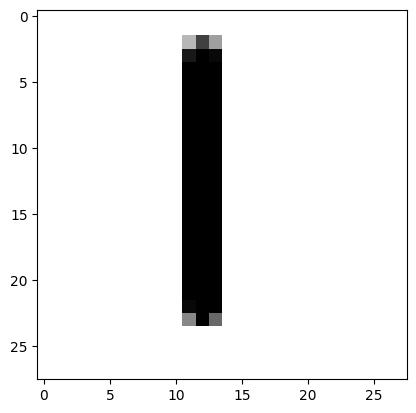

1/1 [==============================] - 0s 26ms/step
The number is probably a 2


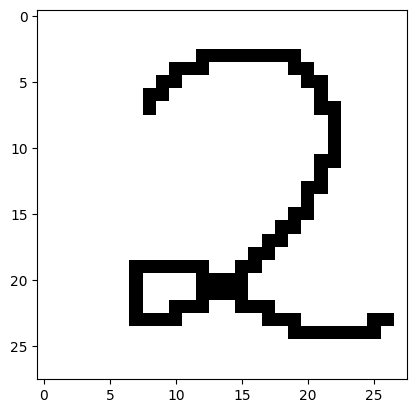

1/1 [==============================] - 0s 30ms/step
The number is probably a 3


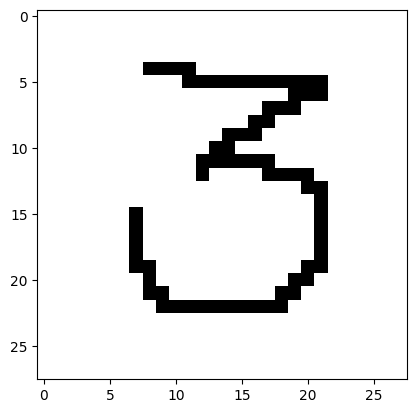

1/1 [==============================] - 0s 27ms/step
The number is probably a 2


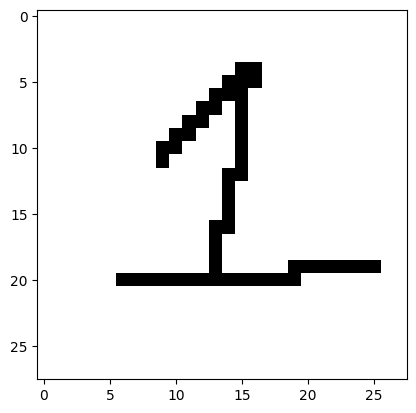

In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model




image_number = 1
model = load_model('mnist6.h5')
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1

In [12]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

# Load model
model = load_model('mnist.h5')

# Function to predict digit
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

# Function to segment image
def segment_image(img):
    # Convert to grayscale and apply Gaussian filtering
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Threshold the image
    ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Initialize digits list
    digits = []

    # Loop through contours and find digits
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)

        # Ignore small contours
        if w*h < 1000:
            continue

        # Extract digit
        digit = gray[y:y+h, x:x+w]

        # Resize digit to 28x28 pixels
        digit = cv2.resize(digit, (28,28), interpolation=cv2.INTER_AREA)

        # Add digit to list
        digits.append(digit)

    return digits

# Load image
img = cv2.imread('digit.png')

# Segment image
digits = segment_image(img)

# Predict digits
for digit in digits:
    digit = Image.fromarray(digit)
    prediction, confidence = predict_digit(digit)
    print(1)
    print('Predicted digit:', prediction, 'with confidence:', confidence)


In [4]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, y_test))

# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Epoch 1/5
123/469 [======>.......................] - ETA: 1:05 - loss: 0.5034 - accuracy: 0.8445

KeyboardInterrupt: 

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the input data to 4D tensor (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
469/469 [==============================] - 62s 124ms/step - loss: 0.2044 - accuracy: 0.9392 - val_loss: 0.0553 - val_accuracy: 0.9818
Epoch 2/5
469/469 [==============================] - 38s 82ms/step - loss: 0.0542 - accuracy: 0.9832 - val_loss: 0.0381 - val_accuracy: 0.9871
Epoch 3/5
469/469 [==============================] - 33s 70ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0329 - val_accuracy: 0.9886
Epoch 4/5
469/469 [==============================] - 32s 69ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0355 - val_accuracy: 0.9892
Epoch 5/5
469/469 [==============================] - 32s 68ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0259 - val_accuracy: 0.9911
Test loss: 0.025913765653967857
Test accuracy: 0.991100013256073


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Define the model architecture
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with data augmentation and early stopping
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 72s 37ms/step - loss: 0.3815 - accuracy: 0.8799 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1590 - accuracy: 0.9512 - val_loss: 0.0301 - val_accuracy: 0.9904
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1218 - accuracy: 0.9638 - val_loss: 0.0234 - val_accuracy: 0.9919
Epoch 4/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1022 - accuracy: 0.9692 - val_loss: 0.0248 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0894 - accuracy: 0.9737 - val_loss: 0.0266 - val_accuracy: 0.9902
Test loss: 0.02659793384373188
Test accuracy: 0.9901999831199646
